# Problem statement

The problem statement for this dataset can be:

**"Predict customer churn for a telecommunications company based on customer demographics, account information, and service usage metrics. The objective is to identify which customers are at risk of leaving to enable targeted retention strategies."**

\
To work with the dataset located at /content/WA_Fn-UseC_-Telco-Customer-Churn.csv, we can outline key objectives that are commonly pursued in a project related to customer churn analysis. Below are potential objectives:

# Objectives for Telco Customer Churn Analysis

1. Understand the Dataset

* Explore the structure, features, and data types in the dataset.
* Identify and handle missing, duplicate, or inconsistent data.

2. Descriptive Statistics and Insights

* Perform an exploratory data analysis (EDA) to summarize key trends in customer demographics, service usage, and tenure.
* Visualize churn distribution across different customer segments.

3. Feature Engineering

* Create new variables or transform existing ones to capture relevant information.
* Encode categorical features using appropriate techniques such as label encoding or one-hot encoding.

4. Predictive Modeling

* Develop machine learning models to predict customer churn.
* Use algorithms such as Logistic Regression, Decision Trees, Random Forest, or XGBoost for prediction.

5. Model Evaluation

* Assess the performance of predictive models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

6. Identify Key Factors Influencing Churn

* Perform feature importance analysis to identify drivers of churn.
* Provide actionable insights for customer retention strategies.

7. Customer Segmentation

* Group customers based on behavior and demographics using clustering techniques.
* Identify high-risk customer segments for targeted marketing campaigns.

8. Churn Reduction Strategies

* Propose recommendations for improving customer retention based on analysis.
* Simulate the impact of interventions like discounts, personalized offers, or better service plans.
9. Visualization and Reporting

* Create intuitive dashboards and visualizations to communicate findings.
* Prepare a detailed report summarizing key insights and recommendations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data visualization

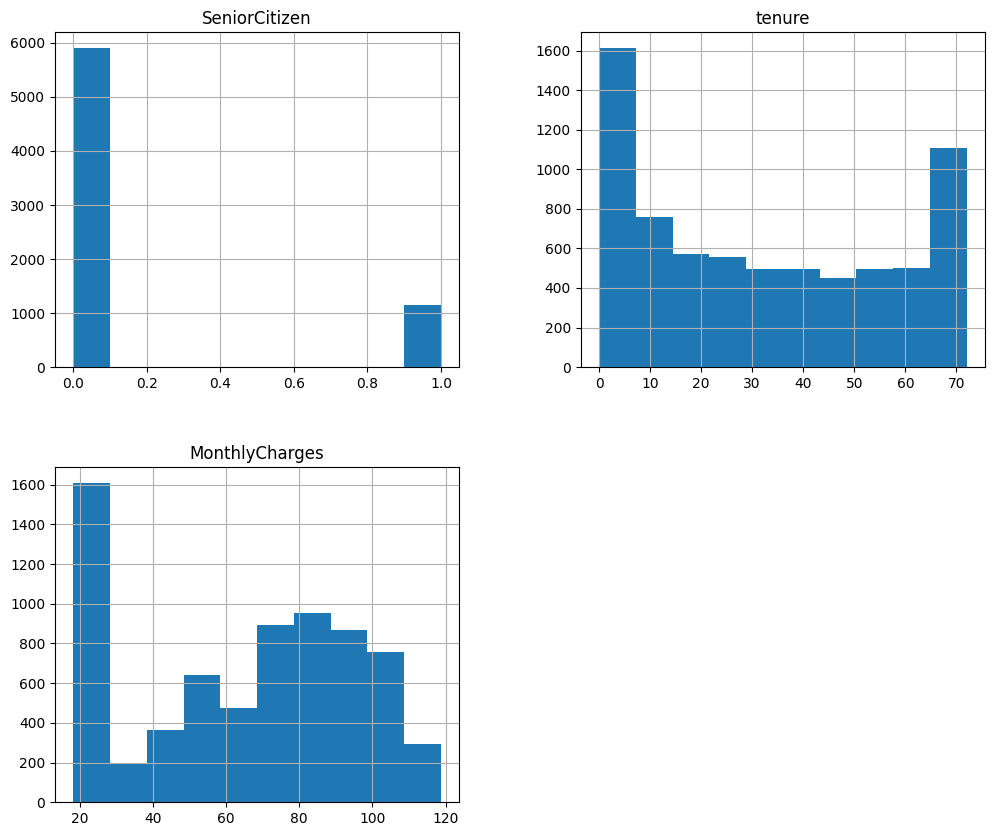

In [ ]:
df.hist(figsize=(12, 10),bins=10)
plt.show()

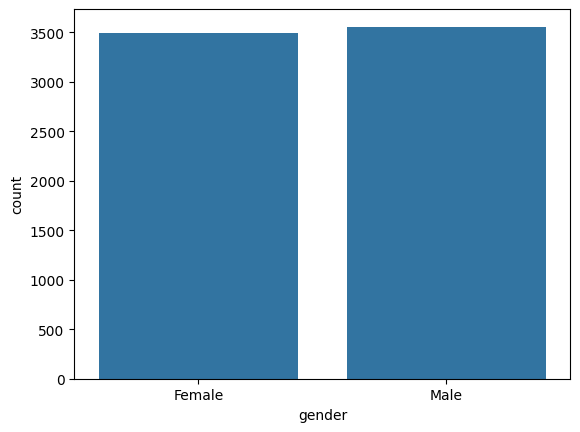

In [ ]:
sns.countplot(x='gender',data=df)
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


<Axes: >

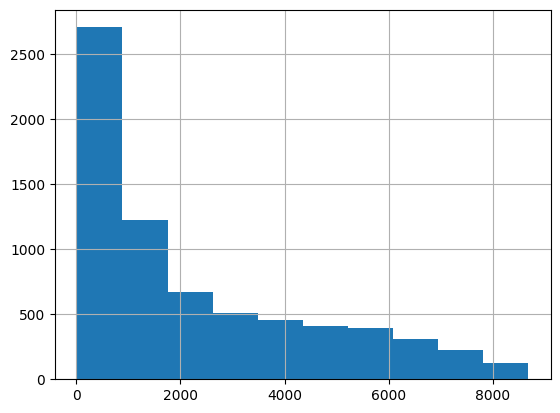

In [ ]:
df["TotalCharges"].hist()

In [ ]:
# there is like some nan value like 1233.vhes  we wi fill that with 0
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


<ipython-input-128-3322c1145a0b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["gender"]=le.fit_transform(df["gender"])
df["Partner"]=le.fit_transform(df["Partner"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["PhoneService"]=le.fit_transform(df["PhoneService"])
df["MultipleLines"]=le.fit_transform(df["MultipleLines"])
df["InternetService"]=le.fit_transform(df["InternetService"])
df["OnlineSecurity"]=le.fit_transform(df["OnlineSecurity"])
df["DeviceProtection"]=le.fit_transform(df["DeviceProtection"])
df["TechSupport"]=le.fit_transform(df["TechSupport"])
df["StreamingTV"]=le.fit_transform(df["StreamingTV"])
df["StreamingMovies"]=le.fit_transform(df["StreamingMovies"])
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"]=le.fit_transform(df["PaymentMethod"])
df["Churn"]=le.fit_transform(df["Churn"])
df["OnlineBackup"]=le.fit_transform(df["OnlineBackup"])

df["Contract"].replace(["Month-to-month","One year","Two year"],[1,2,3],inplace=True)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


<ipython-input-130-3ab1552665ef>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Contract"].replace(["Month-to-month","One year","Two year"],[1,2,3],inplace=True)
<ipython-input-130-3ab1552665ef>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Contract"].replace(["Month-to-month","One ye

In [ ]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         1   
1                    2            0            0                0         2   
2                    0            0            0                0         1   
3                    2            2            0                0         2   
4                    0            0            0                0         1   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         2   
7039                 2            0            2                2         2   
7040                 0            0            0                0         1   
7041                 0            0            0                0         1   
7042                 2            2            2                2         3   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 21 columns]>

In [ ]:
df['gender'].value_counts()

,count
gender,
1,3555
0,3488


In [ ]:
# After finding its imbalanced so oversampoing method is used

from imblearn.over_sampling import SMOTE

# Split into features and target
y = df['Churn']
# Drop 'customerID' column from features
X = df.drop(['Churn', 'customerID'], axis=1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df = pd.concat([X_resampled, y_resampled], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,2,29.850000,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,2,0,3,56.950000,1889.500000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,1,3,53.850000,108.150000,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,2,0,0,42.300000,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,2,70.700000,151.650000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,2,78.335724,317.683405,1
10344,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,2,43.871304,127.949431,1
10345,0,0,0,0,8,1,0,0,0,0,1,0,0,0,1,0,2,50.617327,415.152668,1
10346,0,0,0,0,7,1,0,2,1,1,1,1,1,1,1,0,1,19.577446,155.593565,1


<Axes: >

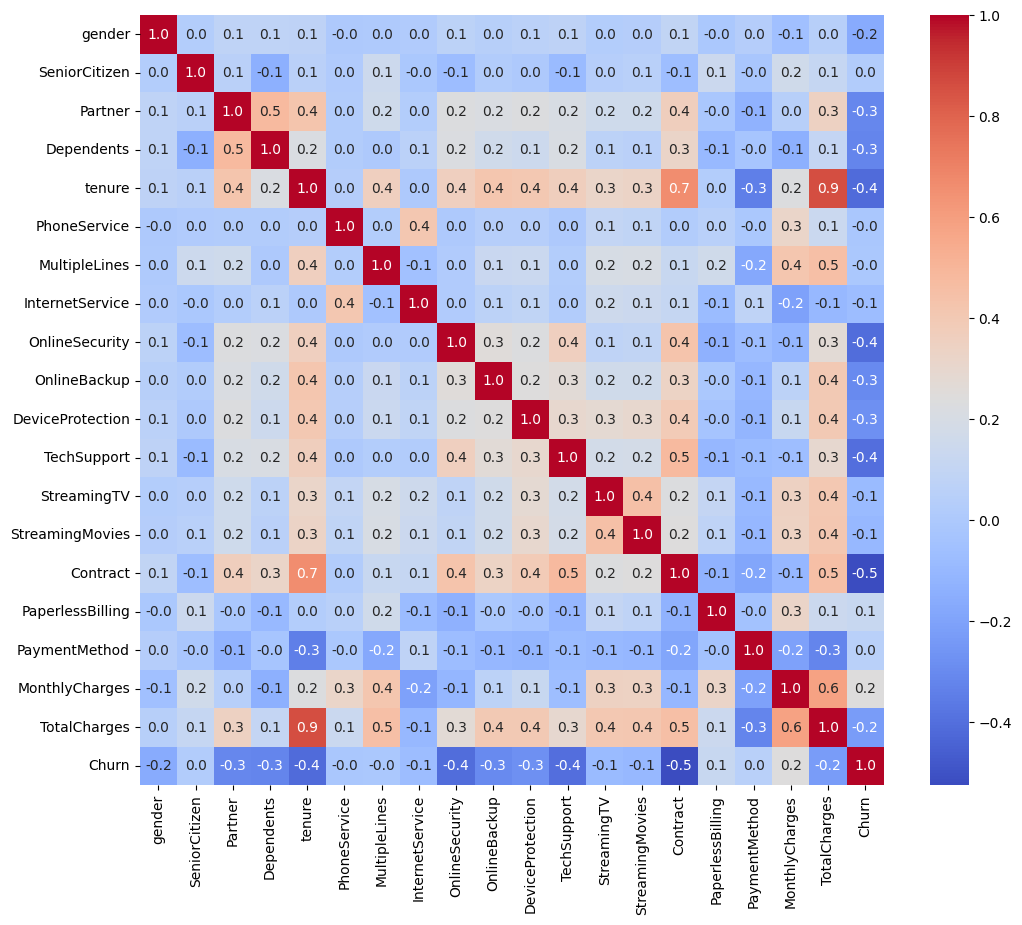

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,fmt='0.01f',cmap='coolwarm')

In [ ]:
x=df.corr()['Churn']
x.sort_values(ascending=False)

,Churn
Churn,1.000000
MonthlyCharges,0.242543
PaperlessBilling,0.119860
PaymentMethod,0.049349
SeniorCitizen,0.018104
MultipleLines,-0.011562
PhoneService,-0.016463
InternetService,-0.078389
StreamingTV,-0.088609
StreamingMovies,-0.101895


In [ ]:
df.drop("TotalCharges",axis=1,inplace=True)
# df.drop("Contract",axis=1)

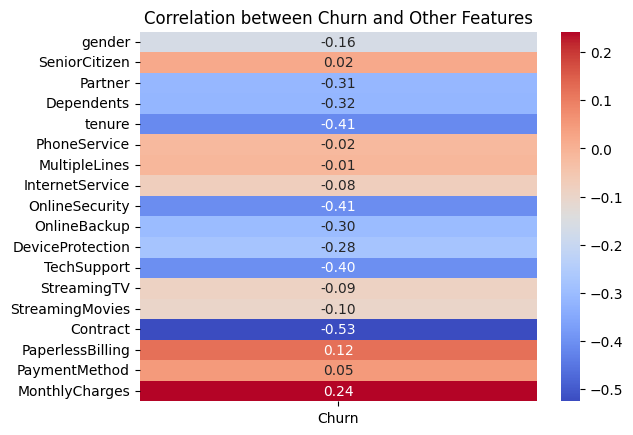

In [ ]:
corr=df.corr()['Churn']
corr=corr.drop("Churn")

sns.heatmap(corr.to_frame(),fmt=".2f",annot=True,cmap="coolwarm")
plt.title('Correlation between Churn and Other Features')
plt.show()

In [ ]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
3145,0,0,0,0,4,1,0,1,0,2,0,0,0,0,1,1,0,76.65,1


In [ ]:
df.drop("gender",axis=1,inplace=True)
df.drop("SeniorCitizen",axis=1,inplace=True)
df.drop("PhoneService",axis=1,inplace=True)
df.drop("MultipleLines",axis=1,inplace=True)
df.drop("InternetService",axis=1,inplace=True)
df.drop("StreamingTV",axis=1,inplace=True)
df.drop("StreamingMovies",axis=1,inplace=True)
df.drop("PaperlessBilling",axis=1,inplace=True)
df.drop("PaymentMethod",axis=1,inplace=True)

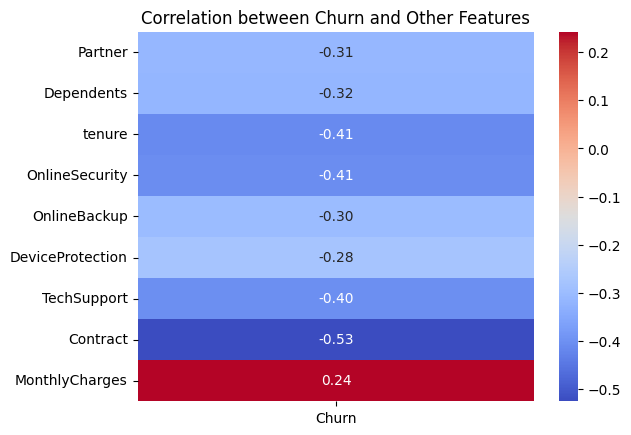

In [ ]:
corr=df.corr()['Churn']
corr=corr.drop("Churn")

sns.heatmap(corr.to_frame(),fmt=".2f",annot=True,cmap="coolwarm")
plt.title('Correlation between Churn and Other Features')
plt.show()

# Skewness and loging

array([[<Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>],
       [<Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

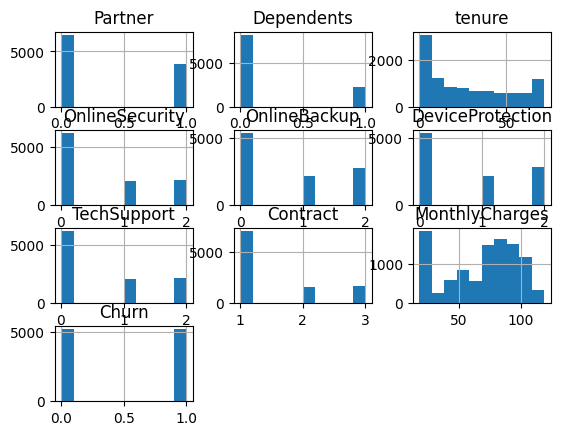

In [ ]:
df.hist()

In [ ]:
df.sample()

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn
3434,0,0,11,2,0,0,2,2,54.6,0


In [ ]:
df.skew()

,0
Partner,0.509879
Dependents,1.390327
tenure,0.512360
OnlineSecurity,0.816044
OnlineBackup,0.497398
DeviceProtection,0.482159
TechSupport,0.803960
Contract,1.160249
MonthlyCharges,-0.431580
Churn,0.000000


In [ ]:
# There is only this two is continues data and its slightly skewed
df["MonthlyCharges"]=np.log1p(df["MonthlyCharges"])
df["tenure"]=np.log1p(df["tenure"])

# Outlier removing

<Axes: >

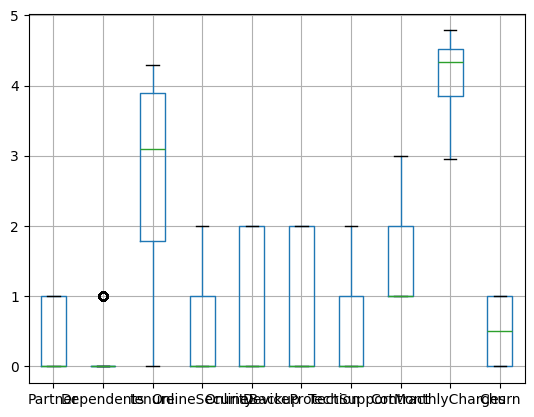

In [ ]:
df.boxplot()

In [ ]:
df.shape

(10348, 10)

In [ ]:

# # outlier removing only dependents column
# Q1 = df["Dependents"].quantile(0.25)
# Q3 = df["Dependents"].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# #Instead of assigning the filtered dataframe,
# #filter the original dataframe using the boolean condition
# df = df[(df["Dependents"] >= lower_bound) & (df["Dependents"] <= upper_bound)]

In [ ]:
# # Function to remove outliers using the IQR method except for one column
# def remove_outliers_iqr(df, exclude_column):
#     for col in df.columns:
#         # Skip the specified column
#         if col == exclude_column:
#             continue
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 2 * IQR
#         upper_bound = Q3 + 2 * IQR
#         # Filter the DataFrame to remove rows with outliers in each column
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# # Specify the column to exclude
# df_cleaned = remove_outliers_iqr(df, exclude_column='price')
# df=df_cleaned


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.81
Decision Tree accuracy: 0.77
Random Forest accuracy: 0.82
SVM accuracy: 0.82
KNN accuracy: 0.83


In [ ]:
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,Churn
0,1,0,0.693147,0,2,0,0,1,3.429137,0
1,0,0,3.555348,2,0,2,0,2,4.059581,0
2,0,0,1.098612,2,2,0,0,1,4.004602,1
3,0,0,3.828641,2,0,2,2,2,3.768153,0
4,0,0,1.098612,0,0,0,0,1,4.272491,1
...,...,...,...,...,...,...,...,...,...,...
10343,0,0,1.609438,0,0,0,0,1,4.373689,1
10344,0,0,1.386294,0,0,0,0,1,3.803798,1
10345,0,0,2.197225,0,0,1,0,1,3.943857,1
10346,0,0,2.079442,1,1,1,1,1,3.024196,1


# Diamonsionality reduction

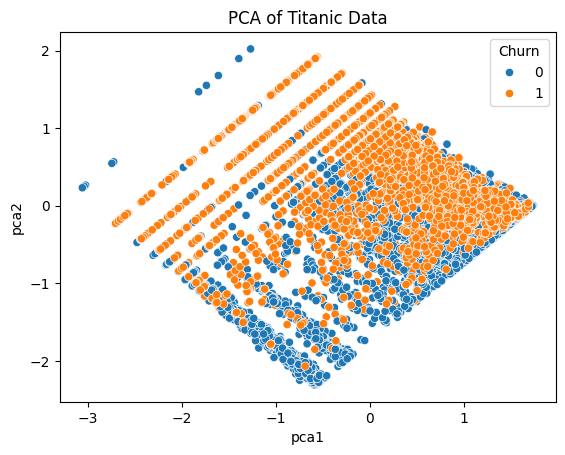

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features=['MonthlyCharges','tenure']
x= StandardScaler().fit_transform(df[features])


pca= PCA(n_components=2)
pca_result= pca.fit_transform(x)

df["pca1"]= pca_result[:,0]
df["pca2"]= pca_result[:,1]

sns.scatterplot(x="pca1", y="pca2", hue="Churn",data=df)
plt.title("PCA of Titanic Data")
plt.show()

In [ ]:
x = df[['pca1',"pca2","Partner","Dependents","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract"]]
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.80
Decision Tree accuracy: 0.78
Random Forest accuracy: 0.82
SVM accuracy: 0.82
KNN accuracy: 0.82


# Data scaling

### Standard scaling(Normalisation)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['MonthlyCharges_scaled', 'tenure_scaled']] = scaler.fit_transform(df[['MonthlyCharges', 'tenure']])

In [ ]:

x = df[['MonthlyCharges_scaled',"tenure_scaled","Partner","Dependents","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract"]]
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.80
Decision Tree accuracy: 0.77
Random Forest accuracy: 0.82
SVM accuracy: 0.82
KNN accuracy: 0.82


### MINMAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

df[['MonthlyCharges_normalized', 'tenure_normalized']] = minmax_scaler.fit_transform(df[['MonthlyCharges', 'tenure']])


In [ ]:
x = df[['MonthlyCharges_normalized',"tenure_normalized","Partner","Dependents","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract"]]
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.2f}')

Logistic Regression accuracy: 0.81
Decision Tree accuracy: 0.77
Random Forest accuracy: 0.83
SVM accuracy: 0.82
KNN accuracy: 0.82


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

model=RandomForestClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("RandomForestClassifier: ",accuracy)
print()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


RandomForestClassifier:  0.8265700483091788


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1021
           1       0.84      0.81      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

